# MTHM503 Assignment QA

In [1]:
import pandas as pd
import datetime
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

### 1

In [2]:
accidents=pd.read_csv('accidents2019.csv')
accidents.head(2)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117


In [3]:
#Each row is an accident, so the number of rows is the number of accidents
print('Number of accidents: ',len(accidents))

Number of accidents:  117536


In [4]:
#List of column names
print('Column names: ',list(accidents))

Column names:  ['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class', '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location']


In [5]:
#100th accident date and location
#I am assuming the accident in the "100th" row is not starting the row count at zero (unlike python index notation)
print('Date:',accidents.iloc[100]['Date'],'Longitude:',accidents.iloc[100]['Longitude'],'Latitude:',accidents.iloc[100]['Latitude'])

Date: 03/01/2019 Longitude: -0.073753 Latitude: 51.417658


In [6]:
accidents['Date']=pd.to_datetime(accidents['Date'],format='%d/%m/%Y') #create datetime data from date column
accidents['Month']=accidents['Date'].dt.month #create a month column
accidents['Count']=1 #add a count column to allow for counting of each accident under different conditions (this will be used a lot)

month_data=accidents[['Month','Count']] #create a new df with only month and count
month_data=month_data.groupby('Month').agg(sum) #group all the accidents by month and use the count column to determine number of accidents per month
month_data

,Count
Month,
1,9371
2,8838
3,9427
4,8899
5,9758
6,9942
7,10325
8,9534
9,10222


November had the most accidents, 10937

### 2

In [7]:
#Number of casualties, sum the casualty column
print('Total number of casualties: ',accidents['Number_of_Casualties'].sum())

Total number of casualties:  153158


In [8]:
LSOA_data=accidents[['LSOA_of_Accident_Location','Number_of_Casualties']] #create new df with relevant data
LSOA_data=LSOA_data.groupby('LSOA_of_Accident_Location').agg(sum) #sum the number of casualties for each area
city=LSOA_data.loc['E01032739'] #extract the number of casualties for the two relevant 
hackney=LSOA_data.loc['E01033708']
city-hackney #find the difference

Number_of_Casualties    136
dtype: int64

City of London 001F had 136 more casualties than Hackney 027G

In [9]:
#Most casualties, area with max value of the column
#The most casualties were:
LSOA_data.max()

Number_of_Casualties    212
dtype: int64

In [10]:
#The area with the most casualties was:
LSOA_data.idxmax()

Number_of_Casualties    E01032739
dtype: object

The LSOA with the highest number of casualties in 2019 was E01032739 (City of London 001F), with 212 casualties

### 3

In [11]:
#Possible values for Did_Police_Officer_Attend_Scene_of_Accident
police_data=accidents[['Did_Police_Officer_Attend_Scene_of_Accident','Count']] 
police_data=police_data.groupby('Did_Police_Officer_Attend_Scene_of_Accident').agg(sum) #count the number of occurances of each variable
police_data

,Count
Did_Police_Officer_Attend_Scene_of_Accident,
1,81309
2,26285
3,9942


Possible values for Did_Police_Officer_Attend_Scene_of_Accident are 1,2,3. According to data.gov.uk these correspond to (1) Yes, (2) No, (3) No - accident was reported using a self completion. There is also a contingency (-1) Data missing or out of range, but this didn't come up in the data.

In [12]:
#fraction attended by officer
total_accidents=police_data.sum()
print(police_data.loc[1]/total_accidents*100,
      police_data.loc[2]/total_accidents*100,
      police_data.loc[3]/total_accidents*100) #print the number of each occurance/total number of accidents to get the fraction of each occurance

Count    69.177954
dtype: float64 Count    22.363361
dtype: float64 Count    8.458685
dtype: float64


69.177954% of accidents had an officer in attendance

In [13]:
#police attendence on weekdays
police_data=accidents[['Did_Police_Officer_Attend_Scene_of_Accident','Day_of_Week','Count']] #take the relevant data
#According to data.gov.uk, the values 7 and 1 correspond to saturday and sunday respectivally 
weekday_data=police_data.query('Day_of_Week<7&Day_of_Week>1') #create a df containing only the data from weekdays
weekday_data=weekday_data.drop('Day_of_Week',axis=1) #get rid of now irrelevant day of week column
weekday_data=weekday_data.groupby('Did_Police_Officer_Attend_Scene_of_Accident').agg(sum) #sum the counts for whether officer attended, now with only weekday data
weekday_data

,Count
Did_Police_Officer_Attend_Scene_of_Accident,
1,60827
2,20634
3,7584


In [14]:
#find the percentage of attendance for oly weekdays
print(weekday_data.loc[1]/weekday_data.sum()*100,weekday_data.loc[2]/weekday_data.sum()*100,
      weekday_data.loc[3]/weekday_data.sum()*100)

Count    68.310405
dtype: float64 Count    23.172553
dtype: float64 Count    8.517042
dtype: float64


In [15]:
#repeat above but for weekend only data to compare
police_data=accidents[['Did_Police_Officer_Attend_Scene_of_Accident','Day_of_Week','Count']]
#According to data.gov.uk, the values 7 and 1 correspond to saturday and sunday respectivally 
weekend_data=police_data.query('Day_of_Week<2|Day_of_Week>6')
weekend_data=weekend_data.drop('Day_of_Week',axis=1)
weekend_data=weekend_data.groupby('Did_Police_Officer_Attend_Scene_of_Accident').agg(sum)
weekend_data

,Count
Did_Police_Officer_Attend_Scene_of_Accident,
1,20482
2,5651
3,2358


In [16]:
#again find percentage of attendance for weekends only data
print(weekend_data.loc[1]/weekend_data.sum()*100,weekend_data.loc[2]/weekend_data.sum()*100,
      weekend_data.loc[3]/weekend_data.sum()*100)

Count    71.889369
dtype: float64 Count    19.834334
dtype: float64 Count    8.276298
dtype: float64


On a weekday, probability of police attenance is 68.310405%. on a weekend probability of police attenance is 71.889369%. Police are more likely to attend if on a weekend. 

This may be due to more police availability on a weekend, or could be due to more severe accidents occuring on a weekend, or some external factor. Correlation does not imply causation.

### 4

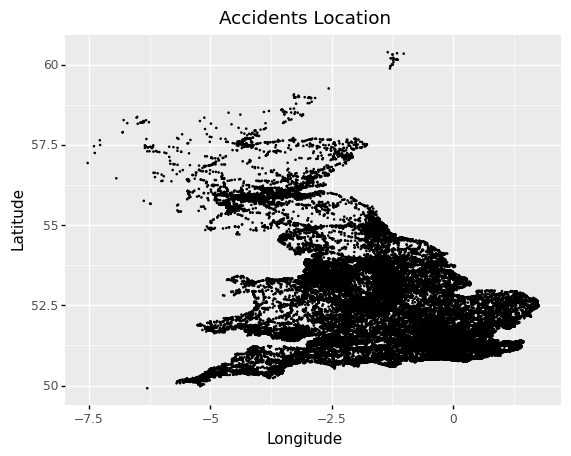

<ggplot: (-9223371927709807676)>

In [17]:
#Plot the location of each accident
#use ggplot and take the x and y values as long and lat. This could also be done using Basemap, but ggplot is nicer
(ggplot(accidents,aes(x='Longitude',y='Latitude'))+
 geom_point(size=0.05)+
 ggtitle('Accidents Location'))

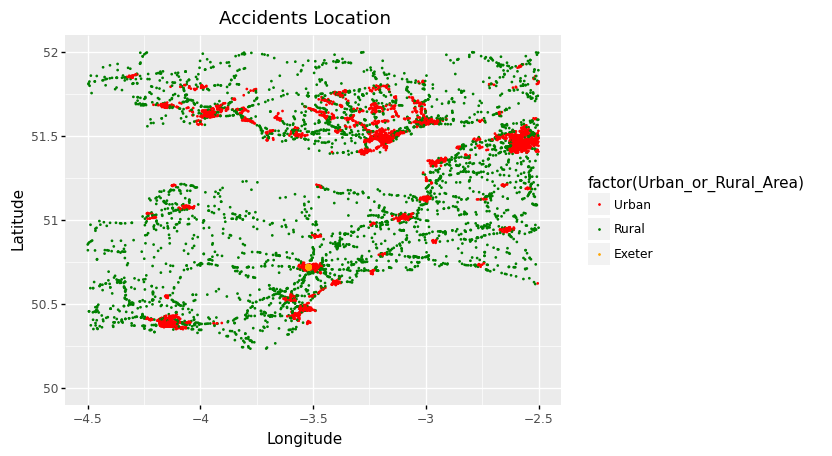

<ggplot: (-9223371927709794316)>

In [18]:
#Improved plot
#colour by the possible values for Urban_or_Rural_Area
#limit x and y axis
#add an orange point at Exeter
(ggplot(accidents,aes(x='Longitude',y='Latitude',colour='factor(Urban_or_Rural_Area)'))+
 geom_point(size=0.1)+
 xlim(-4.5,-2.5)+
 ylim(50,52)+
 geom_point(aes(x=-3.52,y=50.72),colour='orange')+
 ggtitle('Accidents Location')+
 scale_colour_manual(values=['red','green','orange'],labels=['Urban','Rural','Exeter']))

### 5

To assess the number of casualties that occur in an accident, the factor influencing the severety of the accident are of interest, rather than the factors that cause more accidents to occur. I will define a casualty rate (number of casualties per occurance of some factor) for the various columns in the data, and assess for the possible values in each column effect the casualty rate. A higher casualty rate means when accidents occur with those factors, more people are likely to be killed.

In [19]:
#I am limited by the number of graphs, so lets collate all the useful data to plot on a single graph.
#This means for now I can only assess data with numerical possible values.
#Each data column with a numerical value can be plotted against the 'rate', defined as the number of casualties per occurance of the variable. 
#Lets create a new df for each variable, and count the number of casualties for each possible value of that variable

police_force_data=accidents[['Police_Force','Number_of_Casualties','Count']] #new df
police_force_data=police_force_data.groupby('Police_Force').agg(sum) #group by possible values
police_force_data['variable']='Police_Force' #add a variable name (this is to make graaphing the data easier)
police_force_data['rate']=police_force_data['Number_of_Casualties']/police_force_data['Count'] #calculate the casualty rate for each possible value

severity_data=accidents[['Accident_Severity','Number_of_Casualties','Count']]
severity_data=severity_data.groupby('Accident_Severity').agg(sum)
severity_data['variable']='Accident_Severity'
severity_data['rate']=severity_data['Number_of_Casualties']/severity_data['Count']

number_vehicles_data=accidents[['Number_of_Vehicles','Number_of_Casualties','Count']]
number_vehicles_data=number_vehicles_data.groupby('Number_of_Vehicles').agg(sum)
number_vehicles_data['variable']='Number_of_Vehicles'
number_vehicles_data['rate']=number_vehicles_data['Number_of_Casualties']/number_vehicles_data['Count']

day_data=accidents[['Day_of_Week','Number_of_Casualties','Count']]
day_data=day_data.groupby('Day_of_Week').agg(sum)
day_data['variable']='Day_of_Week'
day_data['rate']=day_data['Number_of_Casualties']/day_data['Count']

road_class_data=accidents[['1st_Road_Class','Number_of_Casualties','Count']]
road_class_data=road_class_data.groupby('1st_Road_Class').agg(sum)
road_class_data['variable']='1st_Road_Class'
road_class_data['rate']=road_class_data['Number_of_Casualties']/road_class_data['Count']

road_type_data=accidents[['Road_Type','Number_of_Casualties','Count']]
road_type_data=road_type_data.groupby('Road_Type').agg(sum)
road_type_data['variable']='Road_Type'
road_type_data['rate']=road_type_data['Number_of_Casualties']/road_type_data['Count']

speed_data=accidents[['Speed_limit','Number_of_Casualties','Count']]
speed_data=speed_data.groupby('Speed_limit').agg(sum)
speed_data['variable']='Speed_limit'
speed_data['rate']=speed_data['Number_of_Casualties']/speed_data['Count']

junction_detail_data=accidents[['Junction_Detail','Number_of_Casualties','Count']]
junction_detail_data=junction_detail_data.groupby('Junction_Detail').agg(sum)
junction_detail_data['variable']='Junction_Detail'
junction_detail_data['rate']=junction_detail_data['Number_of_Casualties']/junction_detail_data['Count']

junction_control_data=accidents[['Junction_Control','Number_of_Casualties','Count']]
junction_control_data=junction_control_data.groupby('Junction_Control').agg(sum)
junction_control_data['variable']='Junction_Control'
junction_control_data['rate']=junction_control_data['Number_of_Casualties']/junction_control_data['Count']

road_2_class_data=accidents[['2nd_Road_Class','Number_of_Casualties','Count']]
road_2_class_data=road_2_class_data.groupby('2nd_Road_Class').agg(sum)
road_2_class_data['variable']='2nd_Road_Class'
road_2_class_data['rate']=road_2_class_data['Number_of_Casualties']/road_2_class_data['Count']

ped_human_data=accidents[['Pedestrian_Crossing-Human_Control','Number_of_Casualties','Count']]
ped_human_data=ped_human_data.groupby('Pedestrian_Crossing-Human_Control').agg(sum)
ped_human_data['variable']='Pedestrian_Crossing-Human_Control'
ped_human_data['rate']=ped_human_data['Number_of_Casualties']/ped_human_data['Count']

ped_facility_data=accidents[['Pedestrian_Crossing-Physical_Facilities','Number_of_Casualties','Count']]
ped_facility_data=ped_facility_data.groupby('Pedestrian_Crossing-Physical_Facilities').agg(sum)
ped_facility_data['variable']='Pedestrian_Crossing-Physical_Facilities'
ped_facility_data['rate']=ped_facility_data['Number_of_Casualties']/ped_facility_data['Count']

light_data=accidents[['Light_Conditions','Number_of_Casualties','Count']]
light_data=light_data.groupby('Light_Conditions').agg(sum)
light_data['variable']='Light_Conditions'
light_data['rate']=light_data['Number_of_Casualties']/light_data['Count']

weather_data=accidents[['Weather_Conditions','Number_of_Casualties','Count']]
weather_data=weather_data.groupby('Weather_Conditions').agg(sum)
weather_data['variable']='Weather_Conditions'
weather_data['rate']=weather_data['Number_of_Casualties']/weather_data['Count']

surface_data=accidents[['Road_Surface_Conditions','Number_of_Casualties','Count']]
surface_data=surface_data.groupby('Road_Surface_Conditions').agg(sum)
surface_data['variable']='Road_Surface_Conditions'
surface_data['rate']=surface_data['Number_of_Casualties']/surface_data['Count']

special_data=accidents[['Special_Conditions_at_Site','Number_of_Casualties','Count']]
special_data=special_data.groupby('Special_Conditions_at_Site').agg(sum)
special_data['variable']='Special_Conditions_at_Site'
special_data['rate']=special_data['Number_of_Casualties']/special_data['Count']

hazards_data=accidents[['Carriageway_Hazards','Number_of_Casualties','Count']]
hazards_data=hazards_data.groupby('Carriageway_Hazards').agg(sum)
hazards_data['variable']='Carriageway_Hazards'
hazards_data['rate']=hazards_data['Number_of_Casualties']/hazards_data['Count']

rural_data=accidents[['Urban_or_Rural_Area','Number_of_Casualties','Count']]
rural_data=rural_data.groupby('Urban_or_Rural_Area').agg(sum)
rural_data['variable']='Urban_or_Rural_Area'
rural_data['rate']=rural_data['Number_of_Casualties']/rural_data['Count']

police_data=accidents[['Did_Police_Officer_Attend_Scene_of_Accident','Number_of_Casualties','Count']]
police_data=police_data.groupby('Did_Police_Officer_Attend_Scene_of_Accident').agg(sum)
police_data['variable']='Did_Police_Officer_Attend_Scene_of_Accident'
police_data['rate']=police_data['Number_of_Casualties']/police_data['Count']

#create one large df with all the data from above, ready to graph
#the index values must be preserved in the collated df, so that the meaning of possible values for each variable can be found
df=pd.concat([police_force_data,severity_data,number_vehicles_data,day_data,road_type_data,speed_data,light_data,
             weather_data,surface_data,hazards_data,rural_data,police_data,road_class_data,junction_detail_data,
             junction_control_data,road_2_class_data,ped_human_data,ped_facility_data,special_data])
#need to create a column with the index names, so that the index name can be plotted on the x axis
#the index name (or 'value') is the numeric value given by the original data corresponding to the possible values of each catagory
#the meaning of the index value for each variable/catagory is explained on data.gov.uk
df.index.name='value'
df['value']=df.index
df

,Number_of_Casualties,Count,variable,rate,value
value,,,,,
1,29745,25055,Police_Force,1.187188,1
3,1344,1025,Police_Force,1.311220,3
4,4124,2949,Police_Force,1.398440,4
5,2799,2149,Police_Force,1.302466,5
6,4897,3622,Police_Force,1.352015,6
...,...,...,...,...,...
3,295,200,Special_Conditions_at_Site,1.475000,3
4,1808,1328,Special_Conditions_at_Site,1.361446,4
5,284,240,Special_Conditions_at_Site,1.183333,5


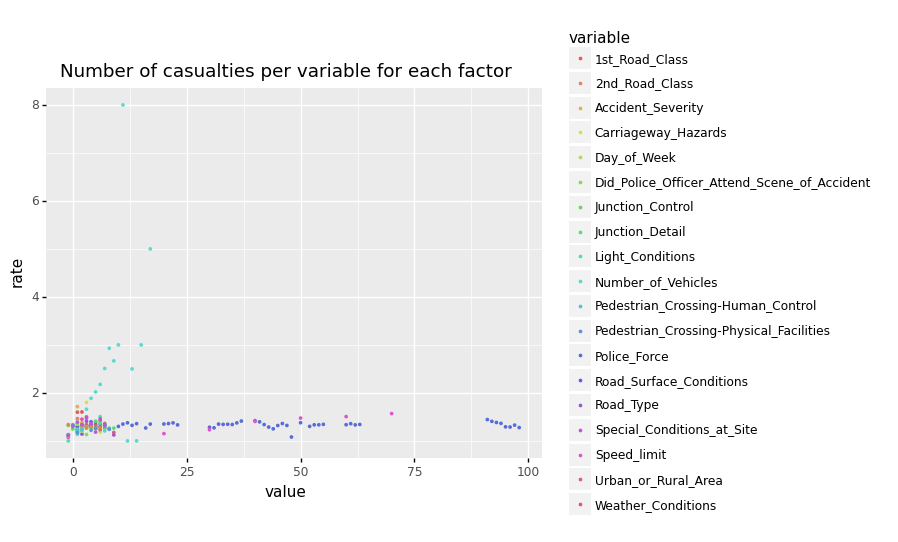

<ggplot: (-9223371927709078564)>

In [20]:
#plot the above data, x value is the possible values for each variable, and has a different meanin for each variable
#y value is the casualty rate for each possible value
#a regression line is not applicable for most of the variables, as many of the meanings defined by data.gov.uk are qualitative and not necessarily in ascending severity.
(
 ggplot(df,aes(x='value',y='rate',colour='variable'))+
 geom_point(size=0.5)+
 ggtitle('Number of casualties per variable for each factor')
)

The above graph shows how the number of casualties per accident is different for each variable. To make this easier to view, each variable can be separated out and viewed individually. The 'value' on the x-axis corresponds to something different for each variable (a comprehensive list is available on data.gov.uk)

In [21]:
#To make the data easier to see, facet_wrap each variable into its own section with a free scale. 
#Since there are so many variables, splitting these into two plots makes things easier to see.
df1=pd.concat([police_force_data,severity_data,number_vehicles_data,day_data,road_type_data,speed_data,light_data,
             weather_data,surface_data,hazards_data])
df2=pd.concat([rural_data,police_data,road_class_data,junction_detail_data,
             junction_control_data,road_2_class_data,ped_human_data,ped_facility_data,special_data])
df1.index.name='value'
df1['value']=df1.index
df2.index.name='value'
df2['value']=df2.index

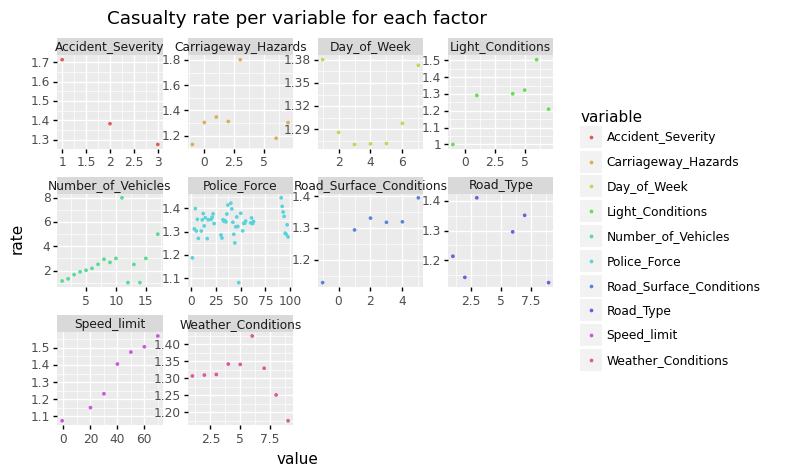

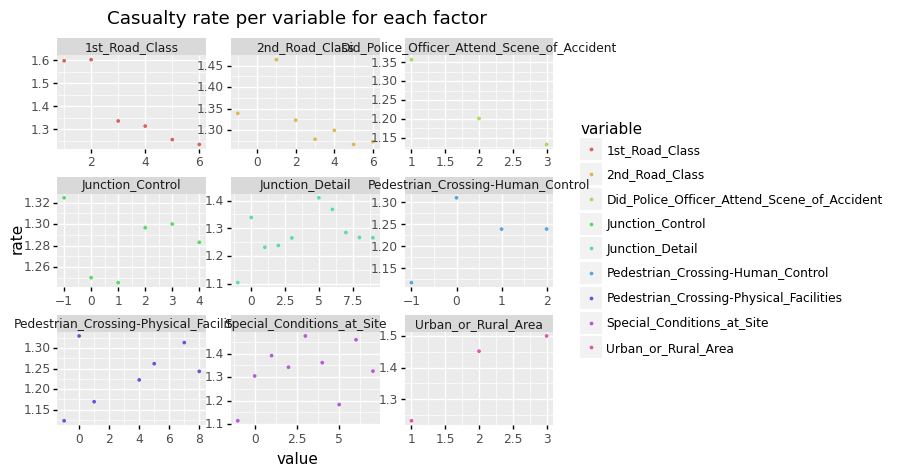

In [22]:
plot_a=(
 ggplot(df1,aes(x='value',y='rate',colour='variable'))+
 geom_point(size=0.5)+
 #geom_smooth(method='lm',se=False)+
 ggtitle('Casualty rate per variable for each factor')+
 facet_wrap('variable',scales='free')+
 theme(panel_spacing=0.25)
)
plot_b=(
 ggplot(df2,aes(x='value',y='rate',colour='variable'))+
 geom_point(size=0.5)+
 #geom_smooth(method='lm',se=False)+
 ggtitle('Casualty rate per variable for each factor')+
 facet_wrap('variable',scales='free')+
 theme(panel_spacing=0.25)
)
print(plot_a,plot_b)

The y-axis of these graphs show the rate of casualties for each variable, but gives no information on the frequency of the accidents, just how likely it is that an accident of that type results in fatalities.

The graphs above include all numerical variables from the data for completeness, but not all of them actually explain what effects the number of casualties. Some of the variables are response variables, with the distribution dependant on the number of casualties. For example, accident severity is explaining what is already known about the number of casualties, there are more casualties per accident for accidents deemed 'fatal' (with a value of 1). Similarly, police officers are more likely to attend a fatal accident.

Some of the above graphs' regression lines are not indicative of the casualty trend, due to the x-axis values for certain variables, but the data may still be relevant. For this reason, regression lines have been omitted.

Many of the variables will give the value -1 for unknown or missing data. This gives us no information about the severity of accidents.

The factors correlating to casualty rate may not be causing the increased casualty rate, but may be a result of a third factor, may be indirectly causing higher casualty rates, or may be a coincidence. I will suggest possible explinations for each factor which fits with common sense.

The y axis scales for the above are free, so will be different for each facet. This is important to note when assessing the casualty rate, as a greater change in casuaty rate for each factor tells us that that factor leads to deadlier accidents. The scales for Number_of_Vehicles and Junction_Controls illustrate this.

The data suggests numerous factors effect the number of casualties for each accident. For each variable the notable factors are:

- Carriageway hazards - A previous accident drastically increases the number of casualties per accident, which makes sense as drivers may hit people already injured, or people on foot trying to help previous victims. Other listed carriageway hazards have little effect compared to no hazard.
- Day of the week - weekends have a much higher casualty rate than the rest of the week. This may be due to more people drink driviving, or many other factors that could cause accidents to become more deadly.
- Light conditions - Darkness with no lighting is considerably more likely to casue a fatality when an accident happens. This fits with common sense, drivers may not brake quick enough due to lack of visibility, hench collide at higher speeds.
- Number of vehicles - This data follows a linear trend, when there are more vehicles, there are more casualties. This is intuitive, as if more vehicles are involved, the accident is likely more severe and puts more lives at risk. This fits with the carriageway hazards data, as an accident involving a previous accident also increases casualty rate.
- Police force - There is no obvious correlation between the police force involved and the number of casualties, which is expected. Some police forces are involved with more fatal accidents on average, but this is likely a product of the location each force is responsible for. Rural areas tend to have a higher casualty rate, so police forces in rural areas will tend to attend more fatal accidents.
- Road surface conditions - Deep floods correlate to the most casualties, likely as these are rarely encountered by most people and cause complete loss of control. Interestingly, wet roads correlate to slightly more fatalities than snow or ice. This may be due to drivers being extra cautious in uncommon snowy conditions.
- Road type - The highest rate of casualties occur on dual carriageways, followed by single carriageways and sliproads. This is likely a result of these roads having higher speed limits, and involve manouvers into other lanes, creating more severe crashes.
- Speed limit- There is an obvious strongly positive linear correlation between speed limit and rate of casualties. This is likely a major factor influencing the likelihood of a fatality in a crash, and is probably the indirect cause of other variables' increased casualty rates. The difference in casualty rates for lower and higher speeds is quite large compared to ther variables, suggesting this is a very influential factor on casualty rate.
- Weather conditions - Rain with high winds is the major contributor to a higher casualty rate in crashes. Other conditions are clearly less dangerous and easier to drive in (like no rain or no wind), or may cause drivers to be more cautios or drive slower (like snow or fog). The drastically lower casualty rates correspond to other and unknown, which tells us very little.
- 1st road class - Busier, faster roads like motorways have a clear correlation with casualty rate, where as slower roads like C roads appear to be much more safe. The difference in casualty rates for smaller and larger roads are large compared to ther variables, suggesting this is an influential factor on casualty rate, likely due to the increased speed. There is clear correlation in the decrease of casualty rate and the smaller slower road class.
- 2nd road class - Junctions to faster, busier roads like motorways correlate to much higher casualty rates, as expected.
- Junction Control - Auto traffic signals and stop signs correspond to the highest casualty rates, where as no junction or one manually controlled appear to be safer. This could be due to these signals being installed on already dangerous roads to prevent the number of accidents, but have little impact on severity. The difference in casualty rates for this variable is quite small compared to other variables, suggesting this variable is not as significant as others.
- Junction detail - Slower speed intersections like roundabouts, staggered t-junctions, and privarte driveways correlate to much lower casualty rates when accidents occur.
- Pedestrian crossing (human controlled) - Lower casualty rates are associated with areas where there is a crossing. This is expected, as crossings warn drivers to slow down. The difference to no crossing is small however, likly because a collision with a pedestrian easly causes a fatality.
- Pedestrian crossing (physical facilities) - Zebra crossings give the lowest casualty rate, and accidents with no crossing or with a footbridge give the highest rate, with the others somewhere inbetween. This could be indicative of the safety of the crossing, or could be a product of third factors such as the type of road that facilitate different crossings. Footbridges may have a very high casualty rate due to their installment on particularly dangerous roads, hence when accidents do occur, there is a high chance of a fatality.
- Special conditions - The lowest casualty rate occurs on roads with a defective surface, and the highest rate on roads with obscured road markings/signs or with oil covered surfaces. The casualty rate is likely a direct result ofthese conditions, for example oil causes drivers to lose control, and defective surfaces cause slower driving so crashes are less severe.
- Urban or rural - Urban roads have a much lower casualty rate than rural roads. This could be a result of a combination of other factors, such as more defective road markings, fewer pedestrian crossings, fewer street lights etc.

Due to the limitations set by the question, not all columns of data have been assessed here, but may also be relevent. The time the accident occurs, for example, is expected to be very influential on the casualty rate. The data assessed here howerver may already explain the effect a variable like time has on casualty rate. The effect low light levels have on severity will already address how nightime driving may be more dangerous, for example.

The data shows that many factors effect the deadliness of car crashes, but the suggests that one of the main causes may be the speed of the vehicle during the crash. Increased vehicle speed is a possible explination for many of the increased casualty rates. This is further backed up by the strong positive linear relationship between casualty rate and speed limit. This analysis gives no information on whether speed influences the number of accidents occuring in each situation, but does strongly suggest higher speed majorly increases the number of casualties in a set number of accidents.